# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object

html=browser.html
page_soup = BeautifulSoup(html, 'html.parser')


In [5]:
# Extract all rows of data
table = page_soup.find('table',class_='table')

mars_temps = {}
rows = table.find_all('tr')



In [ ]:
rows


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
# Loop through the rows
temp_list = []
for row in rows:
    td = row.find_all('td')
    row = [col.text for col in td]
    temp_list.append(row)
    
temp_data_df = pd.DataFrame(temp_list, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])
temp_data_df 
    


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,None,None,None,None,None,None,None
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


In [8]:
# I have no idea why I had a extra row in the beggining,  so I just erased it.
temp_data_df = temp_data_df.drop(0)
temp_data_df = temp_data_df.reset_index(drop=True)
temp_data_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [9]:
# Confirm DataFrame was created successfully
temp_data_df


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
data_types = temp_data_df.dtypes
data_types

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
# Change data types for data analysis
temp_data_df['terrestrial_date'] = pd.to_datetime(temp_data_df['terrestrial_date'])
temp_data_df['sol'] = temp_data_df['sol'].astype(int)
temp_data_df['ls'] = temp_data_df['ls'].astype(int)
temp_data_df['month'] = temp_data_df['month'].astype(int)
temp_data_df['min_temp'] = temp_data_df['min_temp'].astype(float)
temp_data_df['pressure'] = temp_data_df['pressure'].astype(float)

In [12]:
# Confirm type changes were successful by examining data types again
data_types = temp_data_df.dtypes
data_types

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
months= temp_data_df ['month'].nunique()
months

12

In [14]:
# 2. How many Martian days' worth of data are there?
days= temp_data_df ['sol'].nunique ()
days

1867

In [15]:
# 3. What is the average low temperature by month?
ave_min_temp= temp_data_df.groupby ('month')['min_temp'].mean ()

ave_min_temp.head()

month
1   -77.160920
2   -79.932584
3   -83.307292
4   -82.747423
5   -79.308725
Name: min_temp, dtype: float64

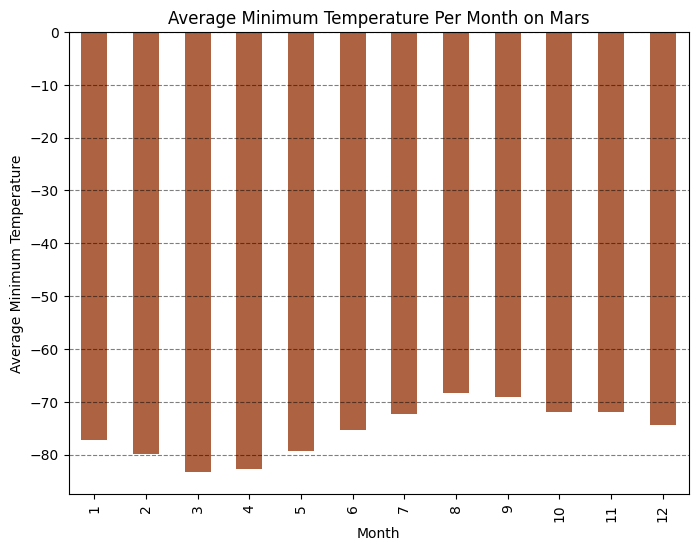

In [16]:
# Plot the average temperature by month

ave_min_temp.plot (kind='bar', color= '#ad6242', figsize= (8,6))
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature')
plt.title('Average Minimum Temperature Per Month on Mars')
plt.grid(True, axis='y', linestyle='--', alpha=0.5, color= 'black')
plt.show ()

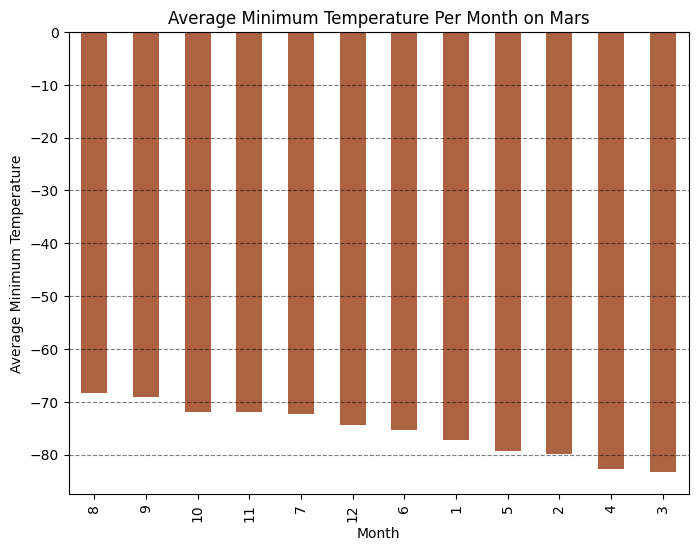

The month '8' is the hottest in Mars. 
 The month '3' is the coldest in the Red Planet.


In [17]:
# Identify the coldest and hottest months in Curiosity's location
sorted_temp = ave_min_temp.sort_values(ascending=False)
sorted_temp.plot(kind='bar', color= '#ad6242', figsize= (8,6))
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature')
plt.title('Average Minimum Temperature Per Month on Mars')
plt.grid(True, axis='y', linestyle='--', alpha=0.5, color= 'black')
plt.show ()
print ("The month '8' is the hottest in Mars. \n The month '3' is the coldest in the Red Planet.")

In [18]:
# 4. Average pressure by Martian month
ave_pressure= temp_data_df.groupby ('month')['pressure'].mean ()
ave_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

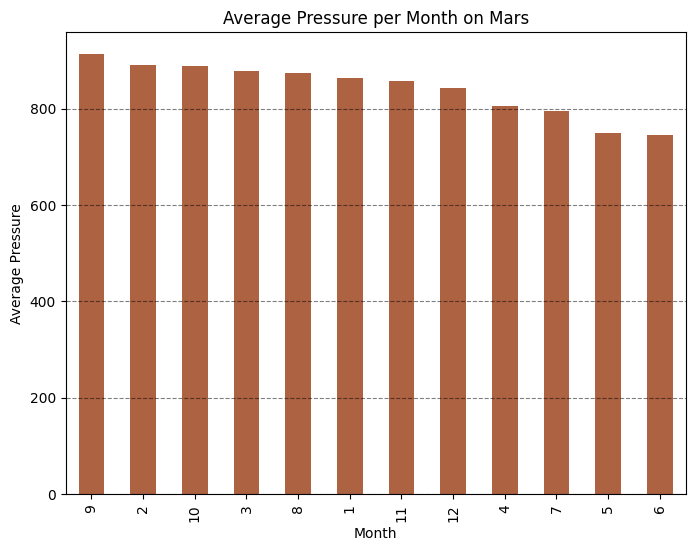

In [43]:
# Plot the average pressure by month
sorted_pressure = ave_pressure.sort_values(ascending=False)
sorted_pressure.plot(kind='bar', color= '#ad6242', figsize= (8,6))
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.title('Average Pressure per Month on Mars')
plt.grid(True, axis='y', linestyle='--', alpha=0.5, color= 'black')
plt.show ()

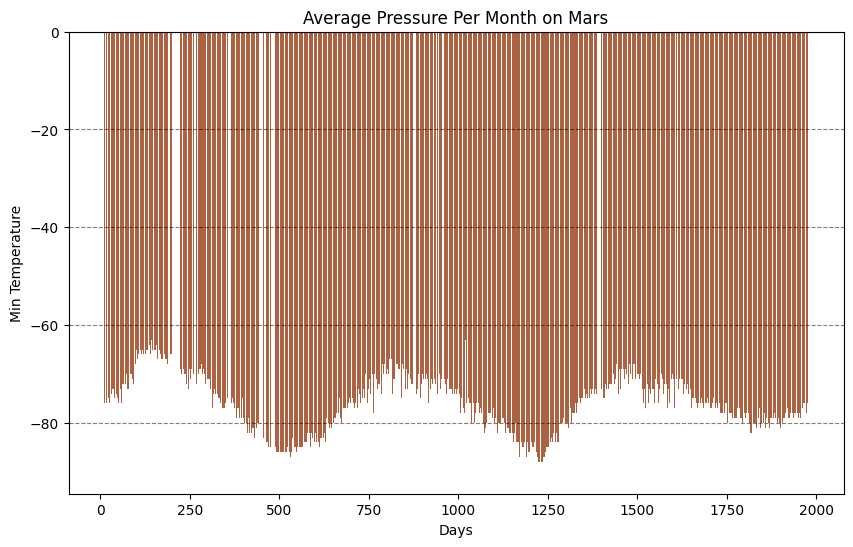

In [37]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.figure(figsize=(10, 6))
plt.bar(temp_data_df['sol'],temp_data_df['min_temp'], color='#ad6242')
#min_temp_time.plot(kind='bar', color= '#ad6242', figsize= (8,6))
plt.xlabel('Days')
plt.ylabel('Min Temperature')
plt.title('Average Pressure Per Month on Mars')
plt.grid(True, axis='y', linestyle='--', alpha=0.5, color= 'black')
plt.show ()

In [50]:
days_mar=temp_data_df['sol'].nunique()
days_mar
days_year=days_mar/3
print (f'A year on Mars is aproximately {days_year} terrestrial days')

A year on Mars is aproximately 622.3333333333334 terrestrial days


On average, the third month has the minimum temperature on Mars, and the eighth month is the warmest. 
The four month is very cold over there. 


Average atmospheric pressure on Mars tends to reach its lowest point in the sixth Martian month and peaks during the ninth month.

Just with the visual, we can see three peaks, so the number of Terrestrial days in a Martian year is approximately 622 Terrestrial days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV
temp_data_df.to_csv('data_from_mars.csv', encoding='utf-8')

In [22]:
browser.quit()